## Peunomia

In [13]:
# Basic
import os
import numpy as np
import matplotlib.pyplot as plt

# Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


### loading the dataset

c:\Users\Hp\Downloads\Chest_X-ray_Pneumonia_Detection\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hp\Downloads\Chest_X-ray_Pneumonia_Detection\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


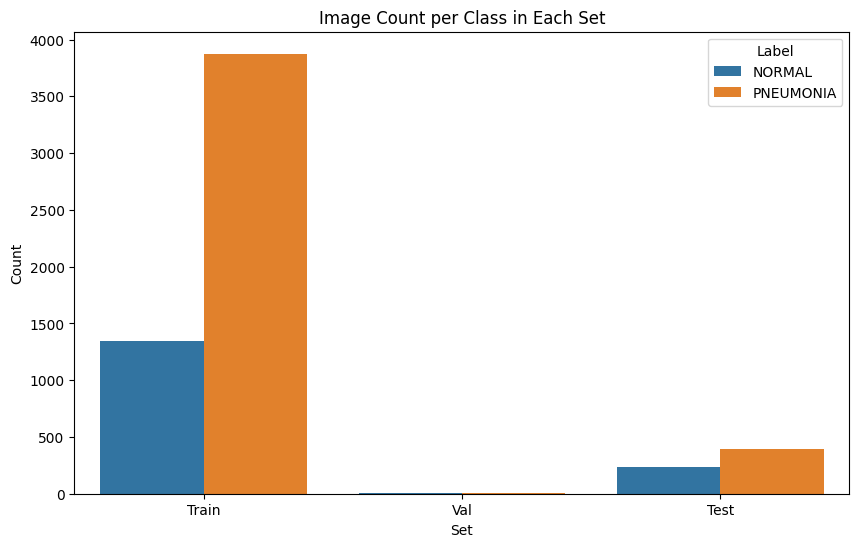

In [14]:
# Step 1: Fix path
def count_images_in_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return 0
    return len([filename for filename in os.listdir(folder_path) if filename.lower().endswith(('.jpeg', '.jpg', '.png'))])

# Step 2: Load counts
categories = ['NORMAL', 'PNEUMONIA']
sets = ['train', 'val', 'test']
data_summary = []

for dataset in sets:
    for category in categories:
        path = f"./datasets/{dataset}/{category}"  # Fixed path
        count = count_images_in_folder(path)
        data_summary.append({'Set': dataset.capitalize(), 'Label': category, 'Count': count})

# Step 3: Plot counts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_summary = pd.DataFrame(data_summary)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_summary, x='Set', y='Count', hue='Label')
plt.title('Image Count per Class in Each Set')
plt.show()


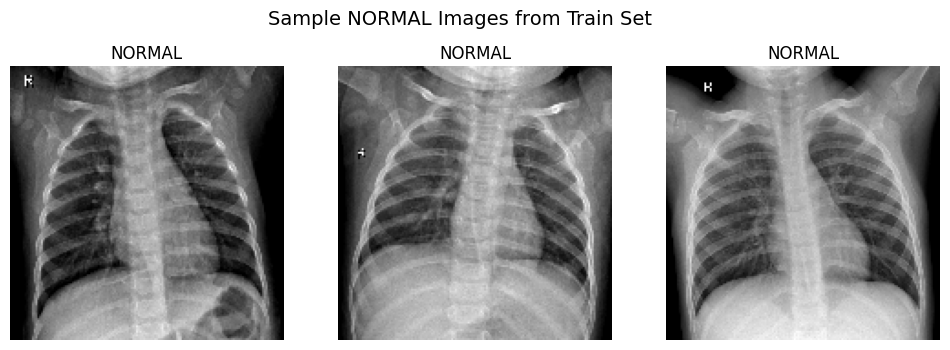

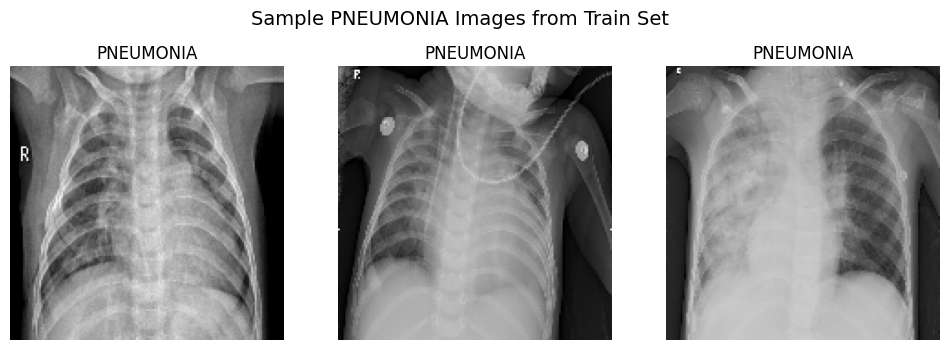

In [15]:
import random
from tensorflow.keras.preprocessing import image
IMG_SIZE = (150, 150)


def display_sample_images(class_name, dataset='train', num_samples=3):
    folder = f"./datasets/{dataset}/{class_name}"
    filenames = random.sample(os.listdir(folder), num_samples)

    plt.figure(figsize=(12, 4))
    for i, fname in enumerate(filenames):
        img_path = os.path.join(folder, fname)
        img = image.load_img(img_path, target_size=IMG_SIZE)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.suptitle(f"Sample {class_name} Images from {dataset.capitalize()} Set", fontsize=14)
    plt.show()

# Display images
display_sample_images('NORMAL')
display_sample_images('PNEUMONIA')


In [16]:
# Paths
train_dir = r"C:\Users\Hp\Downloads\Chest_X-ray_Pneumonia_Detection\datasets\train"
val_dir = r"C:\Users\Hp\Downloads\Chest_X-ray_Pneumonia_Detection\datasets\val"
test_dir = r"C:\Users\Hp\Downloads\Chest_X-ray_Pneumonia_Detection\datasets\test"

# Image settings
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Augment training data, but not val/test
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   samplewise_std_normalization=False,
                                   horizontal_flip=True
                                   )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary')

val_data = val_datagen.flow_from_directory(val_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary',
                                            )


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
import cv2
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

### NOTE : No splitting of data since class mode has already been set to binary

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 75, 75, 64)       

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [20]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
163/163 [==============================] - 585s 4s/step - loss: 0.4880 - accuracy: 0.8432 - val_loss: 14.2559 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
163/163 [==============================] - 209s 1s/step - loss: 0.2204 - accuracy: 0.9166 - val_loss: 28.1648 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/30
163/163 [==============================] - 182s 1s/step - loss: 0.1818 - accuracy: 0.9340 - val_loss: 13.6749 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/30
163/163 [==============================] - 178s 1s/step - loss: 0.1538 - accuracy: 0.9473 - val_loss: 18.6569 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/30
163/163 [==============================] - 167s 1s/step - loss: 0.1473 - accuracy: 0.9482 - val_loss: 1.0117 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/30
163/163 [==============================] - 170s 1s/step - loss: 0.1290 - accuracy: 0.9572 - val_loss: 10.5351 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/30
163/163 [==============================] - ETA: 

In [21]:
# ## transefer learning model b

# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# base_model = MobileNetV2(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
# base_model.trainable = False  # Freeze layers

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation='sigmoid')(x)

# model2 = Model(inputs=base_model.input, outputs=predictions)
# model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_on_generator(model, test_data):
    # Get predictions and true labels
    y_pred_prob = model.predict(test_data)
    y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
    y_true = test_data.classes

    # Evaluation metrics
    loss, accuracy = model.evaluate(test_data, verbose=0)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print metrics
    print(f"\n Evaluation Results:")
    print(f" Accuracy:  {accuracy:.4f}")
    print(f" Loss:      {loss:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NORMAL", "PNEUMONIA"], yticklabels=["NORMAL", "PNEUMONIA"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


20/20 [==============================] - 5s 267ms/step

 Evaluation Results:
 Accuracy:  0.9231
 Loss:      0.2527
 Precision: 0.6364
 Recall:    0.6462
F1 Score:  0.6412

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.39      0.38      0.39       234
   PNEUMONIA       0.64      0.65      0.64       390

    accuracy                           0.55       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.55      0.55       624



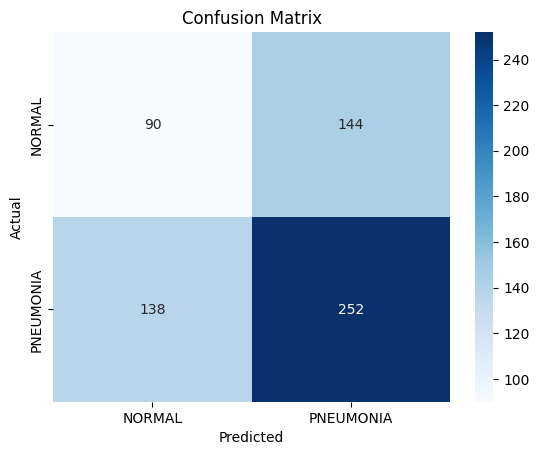

In [25]:
evaluate_model_on_generator(model, test_data)


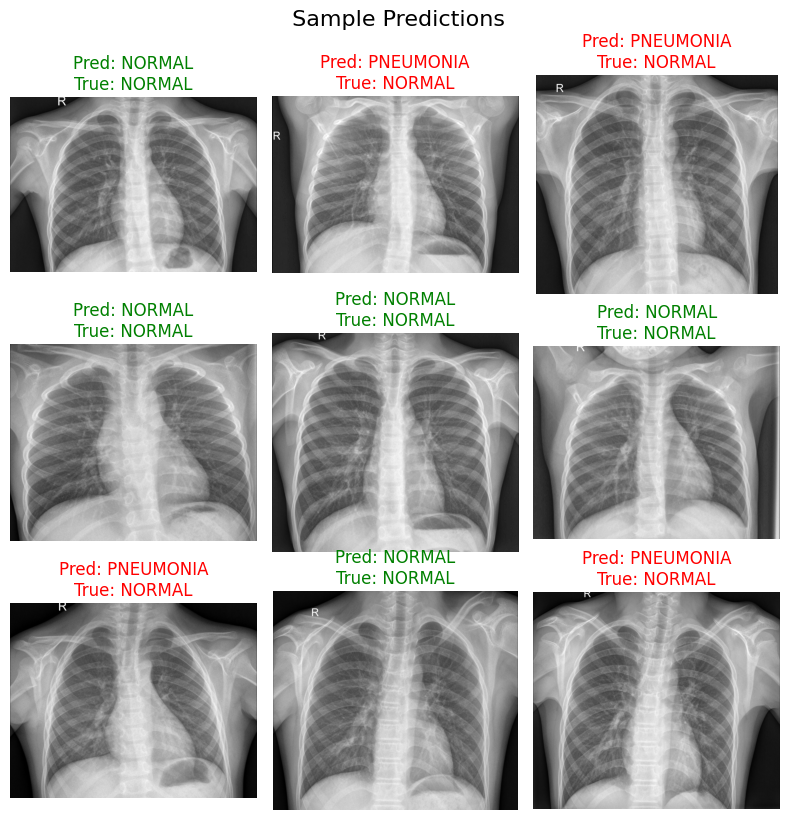

In [26]:
import matplotlib.pyplot as plt

def plot_sample_predictions(model, test_data, class_names=['NORMAL', 'PNEUMONIA'], n=9):
    # Reset generator and predict
    test_data.reset()
    preds = model.predict(test_data, verbose=0)
    preds_labels = (preds > 0.5).astype(int).reshape(-1)
    true_labels = test_data.classes
    image_files = test_data.filenames

    # Plot n images
    plt.figure(figsize=(8, 8))
    for i in range(n):
        img_path = test_data.filepaths[i]
        img = plt.imread(img_path)
        pred_label = class_names[preds_labels[i]]
        true_label = class_names[true_labels[i]]
        color = 'green' if pred_label == true_label else 'red'

        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(" Sample Predictions", fontsize=16, y=1.02)
    plt.show()
plot_sample_predictions(model, test_data)

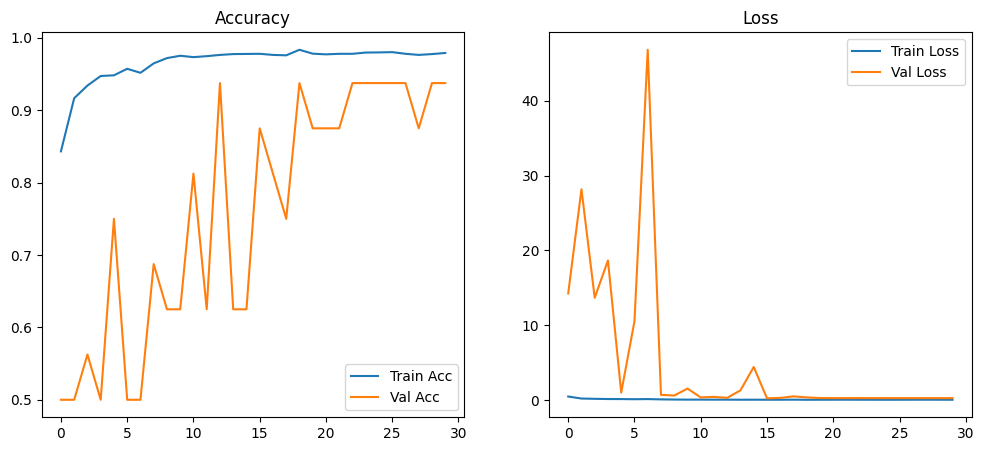

In [29]:
# Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [38]:
model.save('models\chest_xray_cnn_model.h5')
